#### Install and Import Libraries

In [1]:
#!pip install netCDF4 h5netcdf
#!pip install xarray
#!pip install pmdarima

In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import pmdarima as pm
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from keras.optimizers import Adam
from xgboost import XGBRegressor
import numpy as np
import tensorflow as tf
from numpy import arange
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output = 'pandas')

#### Load CSVs

In [3]:
path = r"C:\Users\deola\Downloads\Production_Crops_Livestock_E_All_Data_(Normalized).csv"
production_df = pd.read_csv(path, encoding = 'latin1', low_memory =False)

path1 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\Pesticides.csv"
pesticides_df = pd.read_csv(path1, encoding = 'latin1', low_memory =False)

path2 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\Inputs_FertilizersProduct_E_All_Data_(Normalized).csv"
fertilizerproduct_df = pd.read_csv(path2, encoding = 'latin1', low_memory =False)

path3 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\Fertilizer.csv"
fertilizernutrient_df = pd.read_csv(path3, encoding = 'latin1', low_memory =False)

path4 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"
tempchange_df = pd.read_csv(path4, encoding = 'latin1', low_memory =False)

path5 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\Environment_LivestockManure_E_All_Data_(Normalized).csv"
manure_df = pd.read_csv(path5, encoding = 'latin1', low_memory =False)

path6 = r"C:\Users\deola\OneDrive\Desktop\ProjectData\average-precipitation-per-year.csv"
precipitation_df = pd.read_csv(path6)



#### Explore Data

In [4]:
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127584 entries, 0 to 4127583
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
 13  Note             object 
dtypes: float64(1), int64(5), object(8)
memory usage: 440.9+ MB


In [5]:
pesticides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ï»¿Domain  19863 non-null  object 
 1   Area       19863 non-null  object 
 2   Element    19863 non-null  object 
 3   Item       19863 non-null  object 
 4   Year       19863 non-null  int64  
 5   Unit       19863 non-null  object 
 6   Value      19863 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
fertilizerproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220504 entries, 0 to 220503
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        220504 non-null  int64  
 1   Area Code (M49)  220504 non-null  object 
 2   Area             220504 non-null  object 
 3   Item Code        220504 non-null  int64  
 4   Item             220504 non-null  object 
 5   Element Code     220504 non-null  int64  
 6   Element          220504 non-null  object 
 7   Year Code        220504 non-null  int64  
 8   Year             220504 non-null  int64  
 9   Unit             220504 non-null  object 
 10  Value            220504 non-null  float64
 11  Flag             220504 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 20.2+ MB


In [7]:
fertilizernutrient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29823 entries, 0 to 29822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ï»¿Domain  29823 non-null  object 
 1   Area       29823 non-null  object 
 2   Element    29823 non-null  object 
 3   Item       29823 non-null  object 
 4   Year       29823 non-null  int64  
 5   Unit       29823 non-null  object 
 6   Value      29823 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In [8]:
tempchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
manure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448308 entries, 0 to 2448307
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
dtypes: float64(1), int64(5), object(7)
memory usage: 242.8+ MB


In [10]:
precipitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        10086 non-null  object 
 1   Code                                          10086 non-null  object 
 2   Year                                          10086 non-null  int64  
 3   Average precipitation in depth (mm per year)  10086 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 315.3+ KB


In [11]:
#result = adfuller(country_data['AverageTemperature'])
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

In [12]:
#country_data_diff= country_data['Value'].diff().dropna()

In [13]:
#model = ARIMA(country_data_diff, order=(1,1,1))
#model_fit = model.fit()
#print(model_fit.summary())



In [14]:
# Forecast
#forecast = model_fit.forecast(steps=10)
#print(forecast)

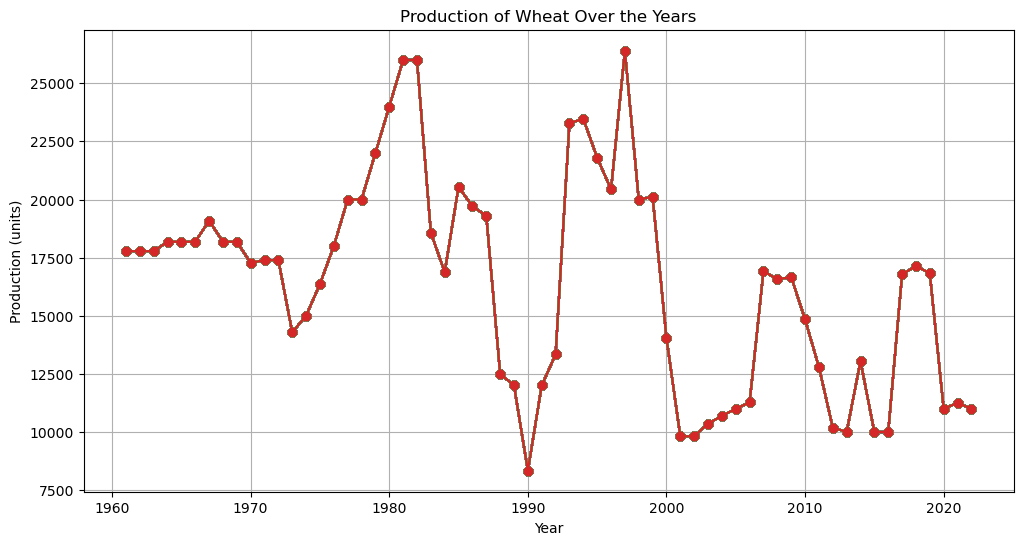

In [15]:
crop_type = 'Wheat'
crop_data = production_df[(production_df['Item'] == crop_type) & (production_df['Element'] == 'Yield')]

# Plotting
plt.figure(figsize=(12, 6))
for country in crop_data['Area'].unique():
    country_data = crop_data[crop_data['Area'] == 'Nigeria']
    plt.plot(country_data['Year'], country_data['Value'],marker='o', linestyle='-', label=country)

plt.title(f'Production of {crop_type} Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (units)')  # Adjust units according to your data
plt.grid(True)
plt.show()

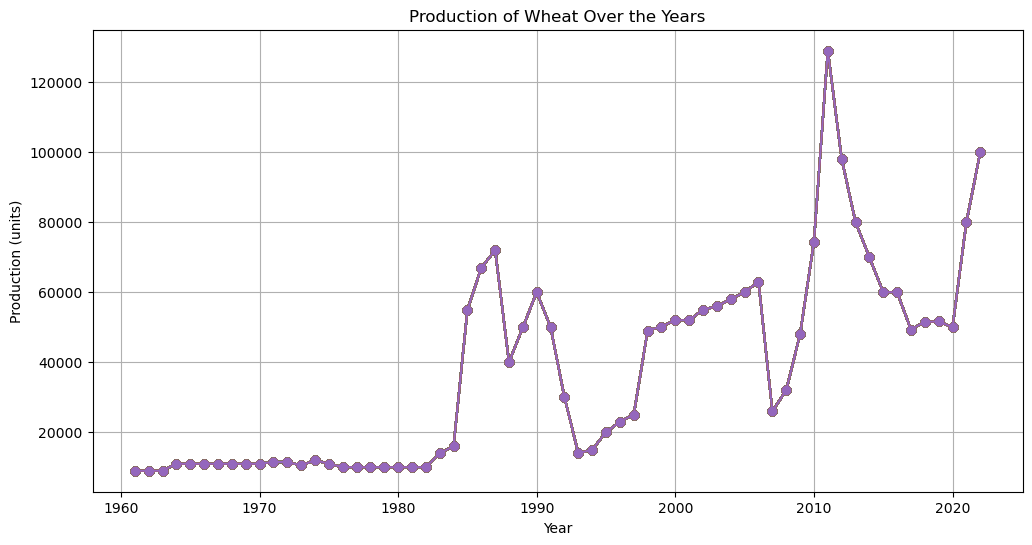

In [16]:
crop_type = 'Wheat'
crop_data = production_df[(production_df['Item'] == crop_type)& (production_df['Element'] == 'Area harvested')]

# Plotting
plt.figure(figsize=(12, 6))
for country in crop_data['Area'].unique():
    country_data = crop_data[crop_data['Area'] == 'Nigeria']
    plt.plot(country_data['Year'], country_data['Value'],marker='o', linestyle='-', label=country)

plt.title(f'Production of {crop_type} Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (units)')  # Adjust units according to your data
plt.grid(True)
plt.show()

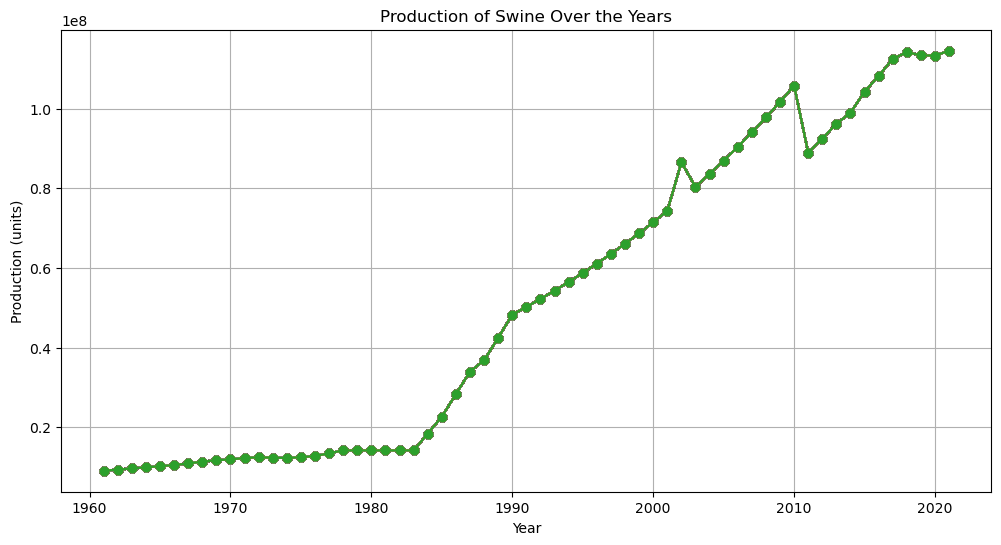

In [17]:
manure_type = 'Swine'
manure_data = manure_df[(manure_df['Item'] == manure_type) & (manure_df['Element'] == 'Manure applied to soils (N content)')]

# Plotting
plt.figure(figsize=(12, 6))
for country in manure_data['Area'].unique():
    country_data = manure_data[manure_data['Area'] == 'Nigeria']
    plt.plot(country_data['Year'], country_data['Value'],marker='o', linestyle='-', label=country)

plt.title(f'Production of {manure_type} Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (units)')  # Adjust units according to your data
plt.grid(True)
plt.show()

#### Change table layout 

##### Temperature

In [18]:
##fixing the temperature data
tempchange_df['dt']= pd.to_datetime(tempchange_df['dt'])
tempchange_df['Year']=tempchange_df['dt'].dt.year
annual_mean_temp= tempchange_df.groupby(
    ['Country', 'Year']).agg({'AverageTemperature':'mean'}).reset_index()

In [19]:
annual_mean_temp[annual_mean_temp['Country'] == 'Zimbabwe']

,Country,Year,AverageTemperature
47808,Zimbabwe,1850,20.154364
47809,Zimbabwe,1851,NaN
47810,Zimbabwe,1852,NaN
47811,Zimbabwe,1853,NaN
47812,Zimbabwe,1854,NaN
...,...,...,...
47967,Zimbabwe,2009,21.377250
47968,Zimbabwe,2010,21.986250
47969,Zimbabwe,2011,21.602417
47970,Zimbabwe,2012,21.521333


##### Fertilizer

In [20]:
fertilizernutrient_df.columns

Index(['ï»¿Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

In [21]:
fertilizer = fertilizernutrient_df.copy()

In [22]:
fertilizer.drop(['ï»¿Domain','Element'], axis = 1, inplace = True)
fertilizer

,Area,Item,Year,Unit,Value
0,Afghanistan,Nutrient nitrogen N (total),1961,t,1000.0
1,Afghanistan,Nutrient nitrogen N (total),1962,t,1000.0
2,Afghanistan,Nutrient nitrogen N (total),1963,t,1000.0
3,Afghanistan,Nutrient nitrogen N (total),1964,t,1000.0
4,Afghanistan,Nutrient nitrogen N (total),1965,t,1000.0
...,...,...,...,...,...
29818,Zimbabwe,Nutrient potash K2O (total),2017,t,40000.0
29819,Zimbabwe,Nutrient potash K2O (total),2018,t,36900.0
29820,Zimbabwe,Nutrient potash K2O (total),2019,t,36900.0
29821,Zimbabwe,Nutrient potash K2O (total),2020,t,16700.0


In [23]:
fertilizer= fertilizer.pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index()
fertilizer

Item,Area,Year,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total)
0,Afghanistan,1961,1000.0,100.0,NaN
1,Afghanistan,1962,1000.0,100.0,NaN
2,Afghanistan,1963,1000.0,100.0,NaN
3,Afghanistan,1964,1000.0,100.0,NaN
4,Afghanistan,1965,1000.0,100.0,NaN
...,...,...,...,...,...
10283,Zimbabwe,2017,65000.0,41400.0,40000.0
10284,Zimbabwe,2018,50100.0,45800.0,36900.0
10285,Zimbabwe,2019,50100.0,45800.0,36900.0
10286,Zimbabwe,2020,39300.0,47900.0,16700.0


In [24]:
fertilizer.rename(columns= 
                     {'Area':'Country', 'Nutrient nitrogen N (total)':'Nitrogen(t/ha)',
                      'Nutrient phosphate P2O5 (total)':'Phosphorus(t/ha)',
                      'Nutrient potash K2O (total)':'Potassium (t/ha)'}, inplace = True)
fertilizer

Item,Country,Year,Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
0,Afghanistan,1961,1000.0,100.0,NaN
1,Afghanistan,1962,1000.0,100.0,NaN
2,Afghanistan,1963,1000.0,100.0,NaN
3,Afghanistan,1964,1000.0,100.0,NaN
4,Afghanistan,1965,1000.0,100.0,NaN
...,...,...,...,...,...
10283,Zimbabwe,2017,65000.0,41400.0,40000.0
10284,Zimbabwe,2018,50100.0,45800.0,36900.0
10285,Zimbabwe,2019,50100.0,45800.0,36900.0
10286,Zimbabwe,2020,39300.0,47900.0,16700.0


##### Pesticides

In [25]:
pesticides = pesticides_df.copy()

In [26]:
pesticides.columns

Index(['ï»¿Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

In [27]:
pesticides.drop(['ï»¿Domain','Element'], axis = 1, inplace = True)
pesticides

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,t,121.00
1,Albania,Pesticides (total),1991,t,121.00
2,Albania,Pesticides (total),1992,t,121.00
3,Albania,Pesticides (total),1993,t,121.00
4,Albania,Pesticides (total),1994,t,201.00
...,...,...,...,...,...
19858,Zimbabwe,Herbicides,2017,t,549.41
19859,Zimbabwe,Herbicides,2018,t,549.41
19860,Zimbabwe,Herbicides,2019,t,549.41
19861,Zimbabwe,Herbicides,2020,t,549.41


In [28]:
pesticides= pesticides.pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index()
pesticides

Item,Area,Year,Herbicides,Insecticides,Pesticides (total)
0,Albania,1990,5.00,70.00,121.00
1,Albania,1991,5.00,70.00,121.00
2,Albania,1992,5.00,70.00,121.00
3,Albania,1993,5.00,70.00,121.00
4,Albania,1994,7.00,117.00,201.00
...,...,...,...,...,...
6679,Zimbabwe,2017,549.41,1092.25,2185.07
6680,Zimbabwe,2018,549.41,1092.25,2185.07
6681,Zimbabwe,2019,549.41,1092.25,2185.07
6682,Zimbabwe,2020,549.41,1092.25,2185.07


In [29]:
pesticides.rename(columns= 
                     {'Area':'Country', 'Herbicides':'Herbicides(t/ha)',
                      'Insecticides':'Insecticides(t/ha)',
                      'Pesticides (total)':'Pesticides (t/ha)'}, inplace = True)

In [30]:
pesticides

Item,Country,Year,Herbicides(t/ha),Insecticides(t/ha),Pesticides (t/ha)
0,Albania,1990,5.00,70.00,121.00
1,Albania,1991,5.00,70.00,121.00
2,Albania,1992,5.00,70.00,121.00
3,Albania,1993,5.00,70.00,121.00
4,Albania,1994,7.00,117.00,201.00
...,...,...,...,...,...
6679,Zimbabwe,2017,549.41,1092.25,2185.07
6680,Zimbabwe,2018,549.41,1092.25,2185.07
6681,Zimbabwe,2019,549.41,1092.25,2185.07
6682,Zimbabwe,2020,549.41,1092.25,2185.07


##### Production

In [31]:
production_df.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Note'],
      dtype='object')

In [32]:
production = production_df.copy()

In [33]:
production= production.drop(['Area Code', 'Area Code (M49)', 'Item Code', 'Item Code (CPC)', 'Element Code', 'Year Code',
       'Flag', 'Note'], axis = 1)
production

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, in shell",Area harvested,1961,ha,0.00
1,Afghanistan,"Almonds, in shell",Area harvested,1962,ha,0.00
2,Afghanistan,"Almonds, in shell",Area harvested,1963,ha,0.00
3,Afghanistan,"Almonds, in shell",Area harvested,1964,ha,0.00
4,Afghanistan,"Almonds, in shell",Area harvested,1965,ha,0.00
...,...,...,...,...,...,...
4127579,Net Food Importing Developing Countries,Vegetables Primary,Production,2018,t,87329042.25
4127580,Net Food Importing Developing Countries,Vegetables Primary,Production,2019,t,89228014.79
4127581,Net Food Importing Developing Countries,Vegetables Primary,Production,2020,t,90776061.71
4127582,Net Food Importing Developing Countries,Vegetables Primary,Production,2021,t,94095378.28


In [34]:
production_re = production.pivot_table(index=['Area', 'Item', 'Year'], columns='Element', values='Value').reset_index()
production_re

Element,Area,Item,Year,Area harvested,Laying,Milk Animals,Prod Popultn,Producing Animals/Slaughtered,Production,Stocks,Yield,Yield/Carcass Weight
0,Afghanistan,"Almonds, in shell",1961,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Afghanistan,"Almonds, in shell",1962,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Afghanistan,"Almonds, in shell",1963,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Afghanistan,"Almonds, in shell",1964,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,Afghanistan,"Almonds, in shell",1965,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1777496,Zimbabwe,Wine,2013,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,NaN
1777497,Zimbabwe,Yoghurt,2010,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1777498,Zimbabwe,Yoghurt,2011,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1777499,Zimbabwe,Yoghurt,2012,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [35]:
# drop irrelivant columns
production_re= production_re.drop(['Laying', 'Milk Animals',
       'Prod Popultn', 'Producing Animals/Slaughtered', 'Stocks','Yield/Carcass Weight'], axis = 1)

In [36]:
production_re = production_re.dropna()
production_re

Element,Area,Item,Year,Area harvested,Production,Yield
15,Afghanistan,"Almonds, in shell",1976,5900.0,9800.0,16610.0
16,Afghanistan,"Almonds, in shell",1977,6000.0,9000.0,15000.0
17,Afghanistan,"Almonds, in shell",1978,6000.0,12000.0,20000.0
18,Afghanistan,"Almonds, in shell",1979,6000.0,10500.0,17500.0
19,Afghanistan,"Almonds, in shell",1980,5800.0,9900.0,17069.0
...,...,...,...,...,...,...
1777248,Zimbabwe,Wheat,2018,16558.0,45000.0,27178.0
1777249,Zimbabwe,Wheat,2019,24186.0,94685.0,39149.0
1777250,Zimbabwe,Wheat,2020,44466.0,212530.0,47796.0
1777251,Zimbabwe,Wheat,2021,66434.0,337212.0,50759.0


In [37]:
# convert values of yield to tonnes/ha
production_re['Yield_in_t/ha'] = production_re['Production']/production_re['Area harvested']

In [38]:
production_re.rename(columns= {'Area':'Country', 'Item':'Crop_type','Yield_in_t/ha':'Yield(t/ha)'}, inplace = True)

In [39]:
production_re.drop('Yield', axis = 1, inplace = True)

In [40]:
production_re.reset_index(drop=True, inplace=True)

In [41]:
production_re.head()

Element,Country,Crop_type,Year,Area harvested,Production,Yield(t/ha)
0,Afghanistan,"Almonds, in shell",1976,5900.0,9800.0,1.661017
1,Afghanistan,"Almonds, in shell",1977,6000.0,9000.0,1.500000
2,Afghanistan,"Almonds, in shell",1978,6000.0,12000.0,2.000000
3,Afghanistan,"Almonds, in shell",1979,6000.0,10500.0,1.750000
4,Afghanistan,"Almonds, in shell",1980,5800.0,9900.0,1.706897


In [42]:
precipitation_df= precipitation_df.drop('Code', axis=1)
precipitation_df

,Entity,Year,Average precipitation in depth (mm per year)
0,Afghanistan,1961,327.0
1,Afghanistan,1962,327.0
2,Afghanistan,1963,327.0
3,Afghanistan,1964,327.0
4,Afghanistan,1965,327.0
...,...,...,...
10081,Zimbabwe,2016,657.0
10082,Zimbabwe,2017,657.0
10083,Zimbabwe,2018,657.0
10084,Zimbabwe,2019,657.0


#### Complete Data

##### Merge all data sets

In [43]:
annual_mean_temp.head(2)

,Country,Year,AverageTemperature
0,Afghanistan,1838,18.379571
1,Afghanistan,1839,NaN


In [44]:
merged_data = pd.merge(production_re, annual_mean_temp, on=['Country', 'Year'], how='left')

In [45]:
merged_data = pd.merge(merged_data, precipitation_df.rename(
    columns={'Entity': 'Country', 'Average precipitation': 'Average_precipitation'}), on=['Country', 'Year'], how='left')

In [46]:
merged_data = pd.merge(merged_data,fertilizer,on=['Country', 'Year'], how='left')

In [47]:
#merged_data = pd.merge(merged_data,pesticides,on=['Country', 'Year'], how='left')

In [48]:
merged_data.head()

,Country,Crop_type,Year,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
0,Afghanistan,"Almonds, in shell",1976,5900.0,9800.0,1.661017,13.708583,327.0,30646.0,13590.0,NaN
1,Afghanistan,"Almonds, in shell",1977,6000.0,9000.0,1.500000,14.805417,327.0,37014.0,17212.0,NaN
2,Afghanistan,"Almonds, in shell",1978,6000.0,12000.0,2.000000,14.329667,327.0,35497.0,18122.0,50.0
3,Afghanistan,"Almonds, in shell",1979,6000.0,10500.0,1.750000,14.262083,327.0,33227.0,16430.0,82.0
4,Afghanistan,"Almonds, in shell",1980,5800.0,9900.0,1.706897,14.887333,327.0,37846.0,12980.0,300.0


In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790483 entries, 0 to 790482
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Country                                       790483 non-null  object 
 1   Crop_type                                     790483 non-null  object 
 2   Year                                          790483 non-null  int64  
 3   Area harvested                                790483 non-null  float64
 4   Production                                    790483 non-null  float64
 5   Yield(t/ha)                                   790477 non-null  float64
 6   AverageTemperature                            394610 non-null  float64
 7   Average precipitation in depth (mm per year)  432211 non-null  float64
 8   Nitrogen(t/ha)                                509091 non-null  float64
 9   Phosphorus(t/ha)                              49

##### Fill null values

In [50]:
# Using the foward fill method
#merged_data['AverageTemperature']=merged_data.groupby(
    #['Country', 'Crop_type'])['AverageTemperature'].apply(
    #lambda group:group.interpolate()).reset_index(level=[0,1], drop=True)
merged_data['AverageTemperature']= merged_data['AverageTemperature'].ffill()
merged_data['Average precipitation in depth (mm per year)']= merged_data[
'Average precipitation in depth (mm per year)'].ffill()
merged_data['Nitrogen(t/ha)']= merged_data['Nitrogen(t/ha)'].ffill()
merged_data['Phosphorus(t/ha)']= merged_data['Phosphorus(t/ha)'].ffill()
merged_data['Potassium (t/ha)']= merged_data['Potassium (t/ha)'].ffill()

In [51]:
merged_data

,Country,Crop_type,Year,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
0,Afghanistan,"Almonds, in shell",1976,5900.0,9800.0,1.661017,13.708583,327.0,30646.0,13590.0,NaN
1,Afghanistan,"Almonds, in shell",1977,6000.0,9000.0,1.500000,14.805417,327.0,37014.0,17212.0,NaN
2,Afghanistan,"Almonds, in shell",1978,6000.0,12000.0,2.000000,14.329667,327.0,35497.0,18122.0,50.0
3,Afghanistan,"Almonds, in shell",1979,6000.0,10500.0,1.750000,14.262083,327.0,33227.0,16430.0,82.0
4,Afghanistan,"Almonds, in shell",1980,5800.0,9900.0,1.706897,14.887333,327.0,37846.0,12980.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...
790478,Zimbabwe,Wheat,2018,16558.0,45000.0,2.717720,20.710750,657.0,50100.0,45800.0,36900.0
790479,Zimbabwe,Wheat,2019,24186.0,94685.0,3.914868,20.710750,657.0,50100.0,45800.0,36900.0
790480,Zimbabwe,Wheat,2020,44466.0,212530.0,4.779607,20.710750,657.0,39300.0,47900.0,16700.0
790481,Zimbabwe,Wheat,2021,66434.0,337212.0,5.075895,20.710750,657.0,39300.0,47900.0,16700.0


In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790483 entries, 0 to 790482
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Country                                       790483 non-null  object 
 1   Crop_type                                     790483 non-null  object 
 2   Year                                          790483 non-null  int64  
 3   Area harvested                                790483 non-null  float64
 4   Production                                    790483 non-null  float64
 5   Yield(t/ha)                                   790477 non-null  float64
 6   AverageTemperature                            790483 non-null  float64
 7   Average precipitation in depth (mm per year)  790483 non-null  float64
 8   Nitrogen(t/ha)                                790483 non-null  float64
 9   Phosphorus(t/ha)                              79

In [53]:
merged_data['Potassium (t/ha)']= merged_data['Potassium (t/ha)'].bfill()

##### Remove zeros and infinte values

In [54]:
merged_data.describe()

,Year,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
count,790483.000000,7.904830e+05,7.904830e+05,7.904770e+05,790483.000000,790483.000000,7.904830e+05,7.904830e+05,7.904830e+05
mean,1993.934842,9.176933e+05,3.912915e+06,inf,19.351174,1085.508106,7.313499e+05,3.255328e+05,2.313175e+05
std,17.617781,9.346172e+06,3.768569e+07,NaN,7.665847,732.862027,2.983124e+06,1.259045e+06,9.261618e+05
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,-19.857750,18.100000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1979.000000,1.296000e+03,4.450000e+03,1.141047e+00,13.570583,562.000000,6.870000e+03,2.100000e+03,6.670000e+02
50%,1995.000000,1.100000e+04,4.362600e+04,4.536632e+00,22.142875,854.000000,6.310000e+04,2.061800e+04,1.160000e+04
75%,2009.000000,9.620000e+04,3.903905e+05,1.136433e+01,26.047500,1537.000000,2.860000e+05,1.300000e+05,7.600000e+04
max,2022.000000,7.396656e+08,3.071264e+09,inf,30.744750,3240.000000,3.114036e+07,1.439325e+07,1.184447e+07


In [55]:
merged_data = merged_data[merged_data['Production'] != 0]
merged_data = merged_data[merged_data['Area harvested'] != 0]

In [56]:
merged_data.describe()

,Year,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
count,789611.000000,7.896110e+05,7.896110e+05,789611.000000,789611.000000,789611.000000,7.896110e+05,7.896110e+05,7.896110e+05
mean,1993.924693,9.187061e+05,3.917237e+06,10.046863,19.349939,1085.703181,7.319498e+05,3.257944e+05,2.315135e+05
std,17.615782,9.351281e+06,3.770626e+07,77.168736,7.665899,732.868608,2.984675e+06,1.259678e+06,9.266309e+05
min,1961.000000,6.000000e-02,4.000000e-02,0.000126,-19.857750,18.100000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1979.000000,1.300000e+03,4.500000e+03,1.141425,13.570583,562.000000,6.888500e+03,2.115000e+03,6.689300e+02
50%,1995.000000,1.106100e+04,4.386885e+04,4.532857,22.142875,854.000000,6.320000e+04,2.061800e+04,1.166700e+04
75%,2009.000000,9.652500e+04,3.917435e+05,11.342857,26.047500,1537.000000,2.865116e+05,1.300000e+05,7.605940e+04
max,2022.000000,7.396656e+08,3.071264e+09,24499.500000,30.744750,3240.000000,3.114036e+07,1.439325e+07,1.184447e+07


#### Time series

In [57]:
timeseries_df = merged_data.copy()
timeseries_df

,Country,Crop_type,Year,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
0,Afghanistan,"Almonds, in shell",1976,5900.0,9800.0,1.661017,13.708583,327.0,30646.0,13590.0,50.0
1,Afghanistan,"Almonds, in shell",1977,6000.0,9000.0,1.500000,14.805417,327.0,37014.0,17212.0,50.0
2,Afghanistan,"Almonds, in shell",1978,6000.0,12000.0,2.000000,14.329667,327.0,35497.0,18122.0,50.0
3,Afghanistan,"Almonds, in shell",1979,6000.0,10500.0,1.750000,14.262083,327.0,33227.0,16430.0,82.0
4,Afghanistan,"Almonds, in shell",1980,5800.0,9900.0,1.706897,14.887333,327.0,37846.0,12980.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...
790478,Zimbabwe,Wheat,2018,16558.0,45000.0,2.717720,20.710750,657.0,50100.0,45800.0,36900.0
790479,Zimbabwe,Wheat,2019,24186.0,94685.0,3.914868,20.710750,657.0,50100.0,45800.0,36900.0
790480,Zimbabwe,Wheat,2020,44466.0,212530.0,4.779607,20.710750,657.0,39300.0,47900.0,16700.0
790481,Zimbabwe,Wheat,2021,66434.0,337212.0,5.075895,20.710750,657.0,39300.0,47900.0,16700.0


In [58]:
timeseries_df['Year']= pd.to_datetime(timeseries_df['Year'],format='%Y')
timeseries_df.set_index('Year', inplace=True)

In [59]:
timeseries_df.isnull().sum()

Country                                         0
Crop_type                                       0
Area harvested                                  0
Production                                      0
Yield(t/ha)                                     0
AverageTemperature                              0
Average precipitation in depth (mm per year)    0
Nitrogen(t/ha)                                  0
Phosphorus(t/ha)                                0
Potassium (t/ha)                                0
dtype: int64

In [60]:
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 789611 entries, 1976-01-01 to 2022-01-01
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Country                                       789611 non-null  object 
 1   Crop_type                                     789611 non-null  object 
 2   Area harvested                                789611 non-null  float64
 3   Production                                    789611 non-null  float64
 4   Yield(t/ha)                                   789611 non-null  float64
 5   AverageTemperature                            789611 non-null  float64
 6   Average precipitation in depth (mm per year)  789611 non-null  float64
 7   Nitrogen(t/ha)                                789611 non-null  float64
 8   Phosphorus(t/ha)                              789611 non-null  float64
 9   Potassium (t/ha)                

In [61]:
timeseries_df.duplicated().sum()

6640

In [62]:
timeseries_df.drop_duplicates(inplace = True)

#### ARIMA MODEL

##### Prediction without Abfuller

In [63]:
# Filter for a specific country and crop type
country = 'Afghanistan'
crop_type = 'Almonds, in shell'
filtered_df = timeseries_df[
    (timeseries_df['Country'] == country) & (timeseries_df['Crop_type'] == crop_type)]

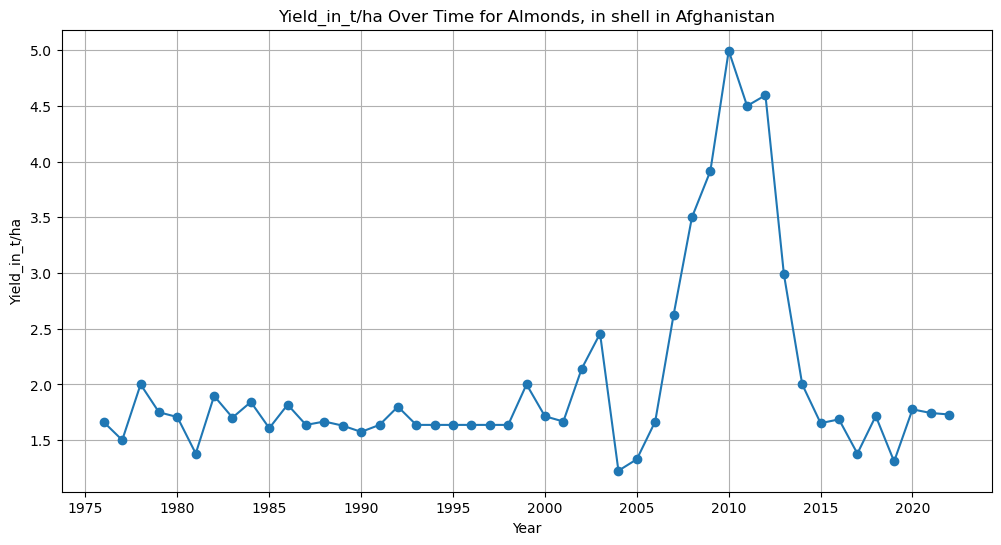

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['Yield(t/ha)'], marker='o', linestyle='-')
plt.title(f'Yield_in_t/ha Over Time for {crop_type} in {country}')
plt.xlabel('Year')
plt.ylabel('Yield_in_t/ha')
plt.grid(True)

In [65]:
# Define the ARIMA model
# ARIMA(p, d, q) where p = number of lag observations, d = degree of differencing, q = size of the moving average window
p, d, q = 5, 1, 0 

# Fit the model
model = ARIMA(filtered_df['Yield(t/ha)'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:            Yield(t/ha)   No. Observations:                   47
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -27.623
Date:                Mon, 08 Jul 2024   AIC                             67.246
Time:                        10:55:40   BIC                             78.218
Sample:                    01-01-1976   HQIC                            71.356
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1412      0.146      0.964      0.335      -0.146       0.428
ar.L2          0.2065      0.121      1.705      0.088      -0.031       0.444
ar.L3         -0.1885      0.115     -1.645      0.1

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [66]:
start = len(filtered_df)
end = start + 10  # Forecast 10 years into the future
forecast = model_fit.predict(start=start, end=end)

In [67]:
list(forecast)

[1.5719611378997067,
 1.6272553000913759,
 1.511245675967054,
 1.5428594873521568,
 1.518389525331493,
 1.5742013176104455,
 1.5619250674498821,
 1.5991845696091702,
 1.5854351435661744,
 1.597470192431978,
 1.5782597081774026]

In [68]:
# Combine historical and forecasted data
predicted_series = pd.Series(list(forecast), index=pd.date_range(start=filtered_df.index[-1], periods=len(forecast), freq='Y'))

In [69]:
predicted_series

2022-12-31    1.571961
2023-12-31    1.627255
2024-12-31    1.511246
2025-12-31    1.542859
2026-12-31    1.518390
2027-12-31    1.574201
2028-12-31    1.561925
2029-12-31    1.599185
2030-12-31    1.585435
2031-12-31    1.597470
2032-12-31    1.578260
Freq: A-DEC, dtype: float64

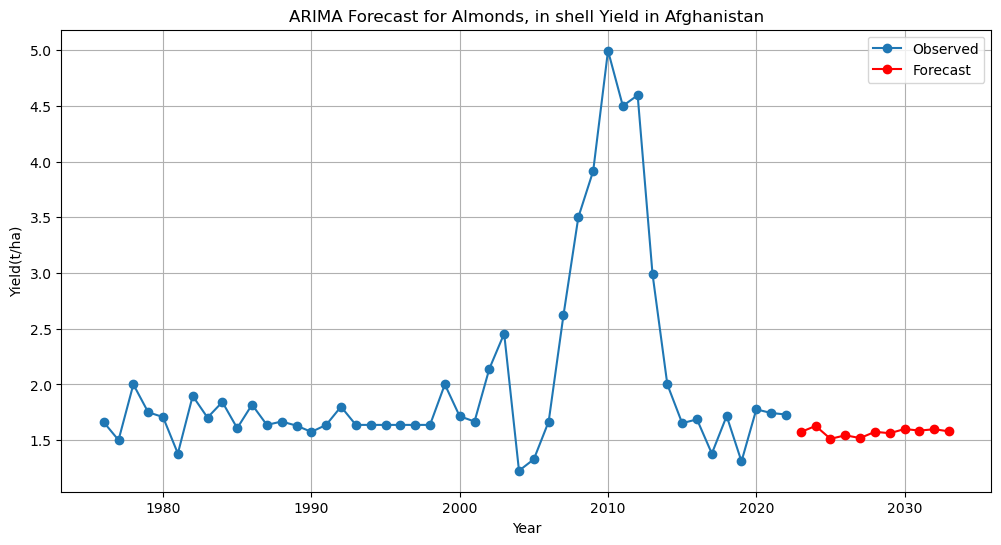

In [70]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['Yield(t/ha)'], marker='o', linestyle='-', label='Observed')
plt.plot(predicted_series.index, predicted_series, marker='o', linestyle='-', color='r', label='Forecast')
plt.title(f'ARIMA Forecast for {crop_type} Yield in {country}')
plt.xlabel('Year')
plt.ylabel('Yield(t/ha)')
plt.legend()
plt.grid(True)
plt.show()

##### Using Abfuller

In [71]:
# Filter for a specific country and crop type
country = 'Germany'
crop_type = 'Wheat'
filtered_df1 = timeseries_df[
    (timeseries_df['Country'] == country) & (timeseries_df['Crop_type'] == crop_type)]

In [72]:
def stationary_test (dataset):
    stattest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF: ',stattest[0])
    print('2. P-Value ', stattest[1])
    print('3. No_of_Lags ', stattest[2])
    print('4. No_of_Observations ', stattest[3])


In [73]:
stationary_test(filtered_df1['Yield(t/ha)'])

1. ADF:  -1.9816977393976236
2. P-Value  0.2946552068829815
3. No_of_Lags  4
4. No_of_Observations  57


In [74]:
Yield = filtered_df1['Yield(t/ha)']
Yield_diff = Yield.diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(Yield_diff)
print('ADF Statistic (differenced): %f' % result_diff[0])
print('p-value (differenced): %f' % result_diff[1])
print('Critical Values (differenced):')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation of the differenced result
if result_diff[1] > 0.05:
    print("The differenced time series is non-stationary.")
else:
    print("The differenced time series is stationary.")


ADF Statistic (differenced): -8.991264
p-value (differenced): 0.000000
Critical Values (differenced):
	1%: -3.546
	5%: -2.912
	10%: -2.594
The differenced time series is stationary.


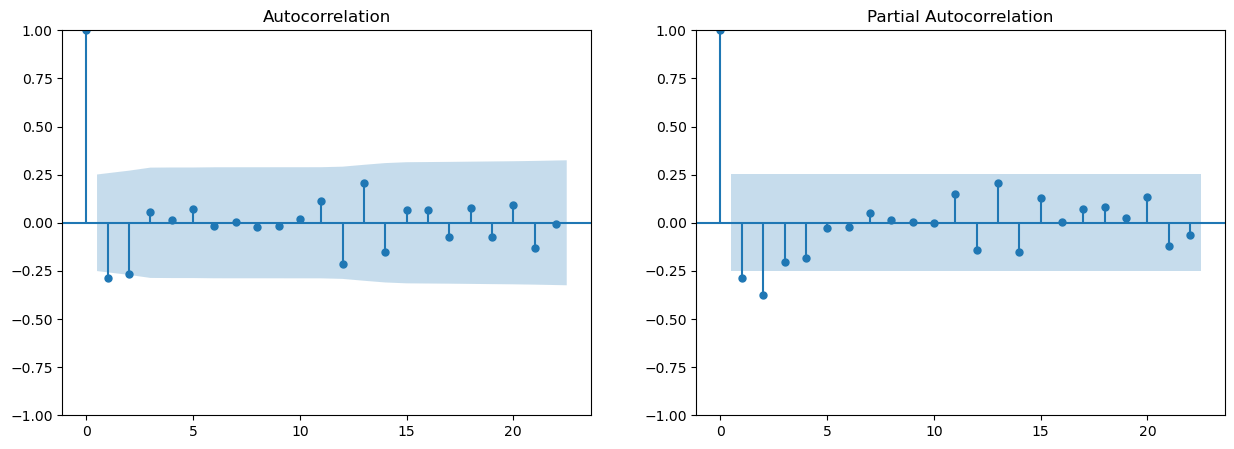

In [75]:
import statsmodels.api as sm

# Plot ACF and PACF for differenced data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.graphics.tsa.plot_acf(Yield_diff, lags=22, ax=axes[0])
sm.graphics.tsa.plot_pacf(Yield_diff, lags=22, ax=axes[1])
plt.show()


##### Auto_ARIMA

In [76]:
#Using auto_arima
stepwise_fit = pm.auto_arima(filtered_df1['Yield(t/ha)'], start_p =0, start_q = 0, max_p = 5, max_q = 5, d = None,
                             seasonal = False, error_action = 'ignore',trace = True, suppress_warnings = True, stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94.404, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=91.172, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81.459, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.803, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82.392, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=81.520, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=81.759, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=86.740, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.291 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -37.730
Date:                Mon, 08 Jul 2024   AIC                             81.459
Time:                        10:55:41   BIC                             87.792
Sample:                    01-01-1961   HQIC                            83.941
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0742      0.023      3.185      0.001       0.029       0.120
ma.L1         -0.6387      0.103     -6.179      0.000      -0.841      -0.436
sigma2         0.2000      0.036      5.537      0.000       0.129       0.271
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.44   Prob(JB):                         0.41
Heteroskedasticity (H):               3.96   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
#split
train = filtered_df1.iloc[:-30]
test = filtered_df1.iloc[-30:]
print (train.shape, test.shape)

(32, 10) (30, 10)


In [78]:
model = ARIMA(train['Yield(t/ha)'], order=(0, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Yield(t/ha)   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -14.955
Date:                Mon, 08 Jul 2024   AIC                             33.911
Time:                        10:55:41   BIC                             36.779
Sample:                    01-01-1961   HQIC                            34.846
                         - 01-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3438      0.200     -1.721      0.085      -0.735       0.048
sigma2         0.1530      0.051      3.008      0.003       0.053       0.253
Ljung-Box (L1) (Q):                   1.30   Jarque-

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [79]:
start = len(train)
end = start + 6
prediction = model_fit.predict(start=start, end=end)
prediction

1993-01-01    6.175625
1994-01-01    6.175625
1995-01-01    6.175625
1996-01-01    6.175625
1997-01-01    6.175625
1998-01-01    6.175625
1999-01-01    6.175625
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<Axes: xlabel='Year'>

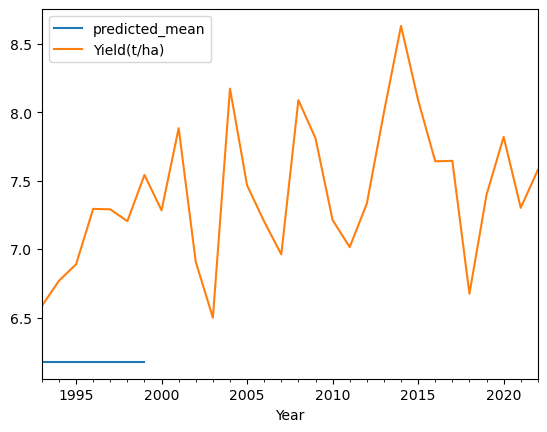

In [80]:
prediction.plot(legend = True)
test['Yield(t/ha)'].plot(legend = True)

##### Normal ARIMA

In [81]:
# Fit the model
arima = ARIMA(filtered_df1['Yield(t/ha)'], order=(5,1,0))
my_ARIMA = arima.fit()

# Summary of the model
print(my_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            Yield(t/ha)   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -39.397
Date:                Mon, 08 Jul 2024   AIC                             90.794
Time:                        10:55:41   BIC                            103.459
Sample:                    01-01-1961   HQIC                            95.757
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3921      0.153     -2.556      0.011      -0.693      -0.091
ar.L2         -0.3781      0.154     -2.463      0.014      -0.679      -0.077
ar.L3         -0.1063      0.193     -0.551      0.5

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [82]:
#define forecast 
start = len(filtered_df1)
end = start + 7  # Forecast 5 years into the future
forecast = my_ARIMA.predict(start=start, end=end)

In [83]:
list(forecast)

[7.495087487919069,
 7.538904635627404,
 7.584827123982091,
 7.495964181015343,
 7.5401812385055065,
 7.541557536872846,
 7.53674800801022,
 7.5411642848102645]

In [84]:
# Combine historical and forecasted data
predicted_series = pd.Series(list(forecast), index=pd.date_range(start=filtered_df1.index[-1], periods=len(forecast), freq='Y'))

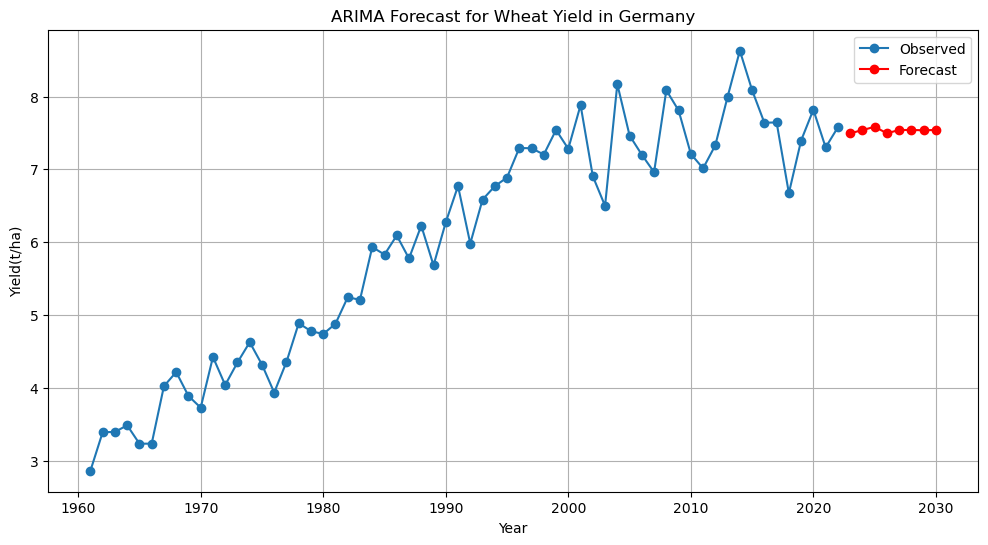

In [85]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(filtered_df1.index, filtered_df1['Yield(t/ha)'], marker='o', linestyle='-', label='Observed')
plt.plot(predicted_series.index, predicted_series, marker='o', linestyle='-', color='r', label='Forecast')
plt.title(f'ARIMA Forecast for {crop_type} Yield in {country}')
plt.xlabel('Year')
plt.ylabel('Yield(t/ha)')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Filter for a specific country and crop type
country = 'India'
crop_type = 'Rice'
filtered_df2 = timeseries_df[
    (timeseries_df['Country'] == country) & (timeseries_df['Crop_type'] == crop_type)]

In [87]:
# Fit the model
arima = ARIMA(filtered_df2['Yield(t/ha)'], order=(5,1,1))
my_ARIMA = arima.fit()

# Summary of the model
print(my_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            Yield(t/ha)   No. Observations:                   62
Model:                 ARIMA(5, 1, 1)   Log Likelihood                  31.489
Date:                Mon, 08 Jul 2024   AIC                            -48.979
Time:                        10:55:42   BIC                            -34.203
Sample:                    01-01-1961   HQIC                           -43.188
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2117      0.180      1.177      0.239      -0.141       0.564
ar.L2          0.3051      0.136      2.249      0.025       0.039       0.571
ar.L3          0.1700      0.140      1.213      0.2

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [88]:
#define prediction 
start = len(filtered_df2)
end = start + 5  # Forecast 5 years into the future
prediction = my_ARIMA.predict(start=start, end=end)

list(prediction)

[4.286861895057205,
 4.359558153090079,
 4.403246414110222,
 4.475423871852511,
 4.527736231615635,
 4.586322473217972]

In [89]:
predicted_series = pd.Series(list(prediction), index=pd.date_range(start=filtered_df2.index[-1], periods=len(prediction), freq='Y'))

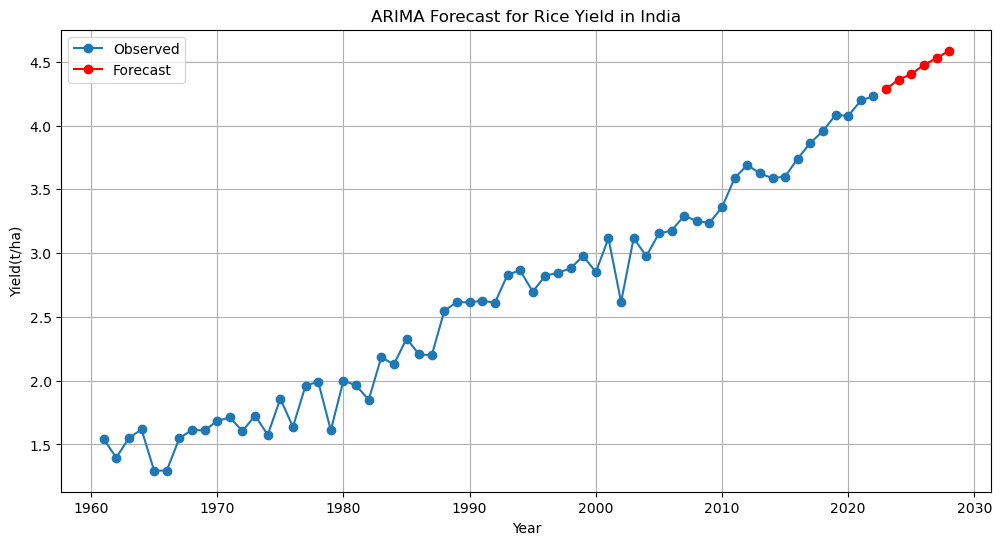

In [90]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(filtered_df2.index, filtered_df2['Yield(t/ha)'], marker='o', linestyle='-', label='Observed')
plt.plot(predicted_series.index, predicted_series, marker='o', linestyle='-', color='r', label='Forecast')
plt.title(f'ARIMA Forecast for {crop_type} Yield in {country}')
plt.xlabel('Year')
plt.ylabel('Yield(t/ha)')
plt.legend()
plt.grid(True)
plt.show()

##### VARIMA

In [91]:
country = 'Afghanistan'
crop_type = 'Almonds, in shell'

# Subset the data
subset= timeseries_df[
    (timeseries_df['Country'] == country) & (timeseries_df['Crop_type'] == crop_type)]

In [92]:
# Differencing the 'AverageTemperature' data
diff_temp = subset['AverageTemperature'].diff().dropna()
fuller_result1 = adfuller(diff_temp)
print('realtemp')
print(f'ADF Statistic (differenced): {fuller_result1[0]}')
print(f'p-value (differenced): {fuller_result1[1]}')

print('----------')

# Differencing the 'Yield_in_t/ha' data
diff_yield = subset['Yield(t/ha)'].diff().dropna()
fuller_result2 = adfuller(diff_yield)
print('realyield')
print(f'ADF Statistic (differenced): {fuller_result2[0]}')
print(f'p-value (differenced): {fuller_result2[1]}')


realtemp
ADF Statistic (differenced): -8.337444248551735
p-value (differenced): 3.243541615545039e-13
----------
realyield
ADF Statistic (differenced): -5.627430614548051
p-value (differenced): 1.109122931281169e-06


In [93]:
from statsmodels.tsa.stattools import grangercausalitytests
print('temp cause yield')
print('----------')
granger_1= grangercausalitytests(subset[['AverageTemperature','Yield(t/ha)' ]], 4)

print('yield cause temp')
print('----------')
granger_2= grangercausalitytests(subset[['Yield(t/ha)', 'AverageTemperature']], 4)

temp cause yield
----------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7638  , p=0.1912  , df_denom=43, df_num=1
ssr based chi2 test:   chi2=1.8869  , p=0.1696  , df=1
likelihood ratio test: chi2=1.8492  , p=0.1739  , df=1
parameter F test:         F=1.7638  , p=0.1912  , df_denom=43, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0004  , p=0.3767  , df_denom=40, df_num=2
ssr based chi2 test:   chi2=2.2509  , p=0.3245  , df=2
likelihood ratio test: chi2=2.1964  , p=0.3335  , df=2
parameter F test:         F=1.0004  , p=0.3767  , df_denom=40, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9608  , p=0.0447  , df_denom=37, df_num=3
ssr based chi2 test:   chi2=10.5627 , p=0.0143  , df=3
likelihood ratio test: chi2=9.4671  , p=0.0237  , df=3
parameter F test:         F=2.9608  , p=0.0447  , df_denom=37, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         

In [94]:
subset1= subset[['AverageTemperature','Yield(t/ha)' ]]
subset1.shape

(47, 2)

In [95]:
train_df=subset1[:-22]
test_df=subset1[-22:]

In [96]:
from statsmodels.tsa.api import VAR
model = VAR (train_df.diff()[1:])

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [97]:
sorted_order = model.select_order(maxlags = 2)
print(sorted_order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>


In [98]:
model = VARMAX(train_df, order=(5, 0), enforce_stationarity =True)
results = model.fit(disp=False)
print(results.summary())


C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


                                     Statespace Model Results                                    
Dep. Variable:     ['AverageTemperature', 'Yield(t/ha)']   No. Observations:                   25
Model:                                            VAR(5)   Log Likelihood                  13.002
                                             + intercept   AIC                             23.996
Date:                                   Mon, 08 Jul 2024   BIC                             54.468
Time:                                           10:55:43   HQIC                            32.448
Sample:                                       01-01-1976                                         
                                            - 01-01-2000                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):             1.39, 0.09   Jarque-Bera (JB):           0.75, 1.63
Prob(Q):                        0.

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [99]:
n_forcast = 12
predict = results.get_prediction(steps = n_forcast)
predictions = predict.predicted_mean

In [100]:
predictions

,AverageTemperature,Yield(t/ha)
1976-01-01,14.614740,1.695496
1977-01-01,14.168934,1.703108
1978-01-01,14.296924,1.776429
1979-01-01,14.840020,1.744886
1980-01-01,14.923893,1.614270
1981-01-01,14.946680,1.426111
1982-01-01,13.967787,1.849087
1983-01-01,14.730368,1.623672
1984-01-01,14.493798,1.837882
1985-01-01,14.671180,1.556976


In [101]:
test_vs_pred =pd.concat([test_df, predictions], axis = 1)

<Axes: >

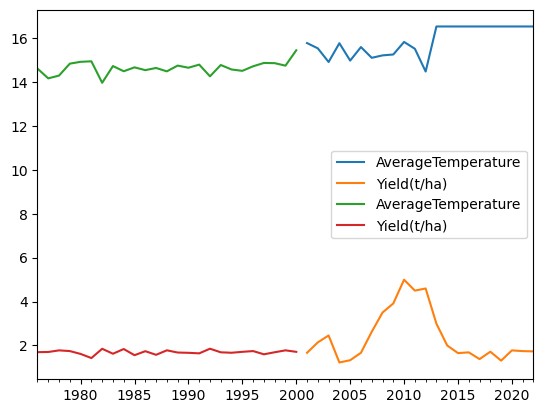

In [102]:
test_vs_pred.plot()

In [103]:
# Example: Forecasting
pred = results.predict(steps=5)

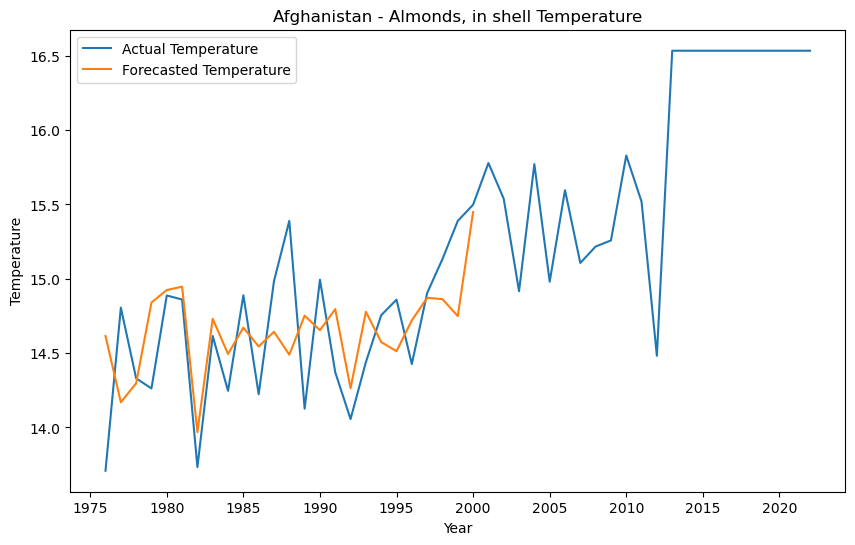

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset['AverageTemperature'], label='Actual Temperature')
plt.plot(pred.index, pred['AverageTemperature'], label='Forecasted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title(f'{country} - {crop_type} Temperature')
plt.legend()
plt.show()

##### Trails

In [105]:
# Filter for a specific country and crop type
country = 'India'
crop_type = 'Rice'
filtered_df = timeseries_df[
    (timeseries_df['Country'] == country) & 
    (timeseries_df['Crop_type'] == crop_type)
]

In [106]:
# Select relevant columns for VARIMA model fitting
filtered_data = filtered_df[['Yield(t/ha)', 'AverageTemperature']]

# Specify the VARIMA model order
order = (1, 1, 1)  # Example order: VARIMA(1, 1, 1)

# Fit the VARIMA model
model_varima = VARMAX(filtered_data, order=order)
model_varima_fit = model_varima.fit(disp=False)  # disp=False to suppress convergence information

# Summary of the VARIMA model
print(model_varima_fit.summary())


                                     Statespace Model Results                                    
Dep. Variable:     ['Yield(t/ha)', 'AverageTemperature']   No. Observations:                   62
Model:                                        VARMA(1,1)   Log Likelihood                  19.233
                                             + intercept   AIC                            -12.466
Date:                                   Mon, 08 Jul 2024   BIC                             15.187
Time:                                           10:55:43   HQIC                            -1.609
Sample:                                       01-01-1961                                         
                                            - 01-01-2022                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):             1.82, 0.03   Jarque-Bera (JB):           5.71, 0.28
Prob(Q):                        0.

C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\deola\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
# Generate future dates for forecasting
n_steps = 10
last_date = filtered_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='AS')[1:]

In [108]:
predict = model_varima_fit.get_prediction(steps = n_steps)
predictions = predict.predicted_mean.iloc[-n_steps:]
predictions.index = future_dates

In [109]:
confidence_intervals =predict.conf_int().iloc[-n_steps:]

In [110]:
print(predictions)

            Yield(t/ha)  AverageTemperature
2023-01-01     3.492418           24.805734
2024-01-01     3.646771           25.114186
2025-01-01     3.692276           25.172500
2026-01-01     3.717480           25.188402
2027-01-01     3.803690           25.194324
2028-01-01     3.900412           25.219939
2029-01-01     3.984559           25.250017
2030-01-01     4.083606           25.275527
2031-01-01     4.112359           25.308245
2032-01-01     4.190413           25.316085


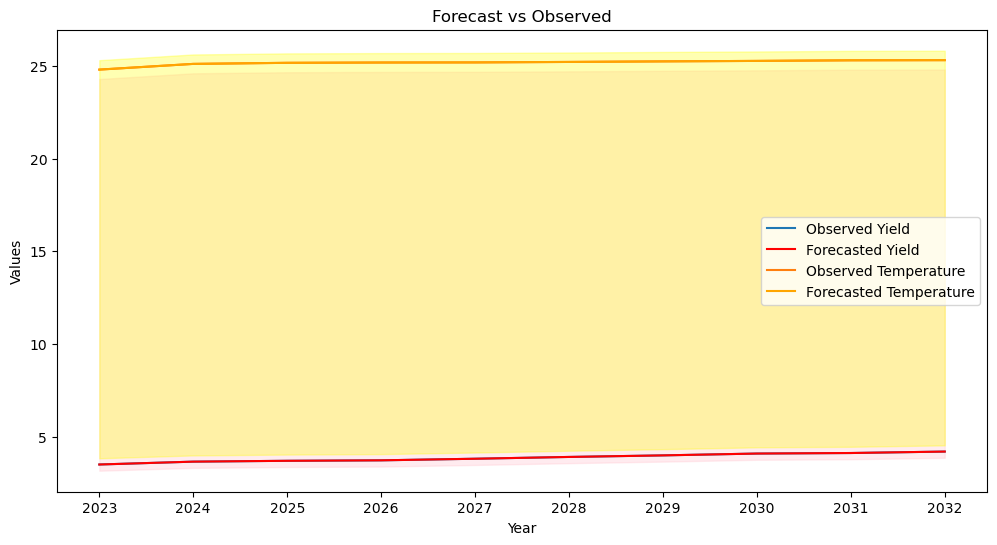

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, predictions['Yield(t/ha)'], label='Observed Yield')
plt.plot(predictions.index, predictions['Yield(t/ha)'], label='Forecasted Yield', color='red')
plt.fill_between(predictions.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)


plt.plot(predictions.index, predictions['AverageTemperature'], label='Observed Temperature')
plt.plot(predictions.index, predictions['AverageTemperature'], label='Forecasted Temperature', color='orange')
plt.fill_between(predictions.index, 
                 confidence_intervals.iloc[:, 2], 
                 confidence_intervals.iloc[:, 3], color='yellow', alpha=0.3)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Forecast vs Observed')
plt.legend()
plt.show()

In [112]:
# Prepare the independent variables (adding constant for intercept)
filtered_data = filtered_df[['Yield(t/ha)', 'AverageTemperature', 'Average precipitation in depth (mm per year)']]
X = filtered_data[['AverageTemperature', 'Average precipitation in depth (mm per year)']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variable
y = filtered_data['Yield(t/ha)']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Yield(t/ha)   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.01e-15
Time:                        10:55:43   Log-Likelihood:                -43.903
No. Observations:                  62   AIC:                             91.81
Df Residuals:                      60   BIC:                             96.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [113]:
predictions = model.predict(X)

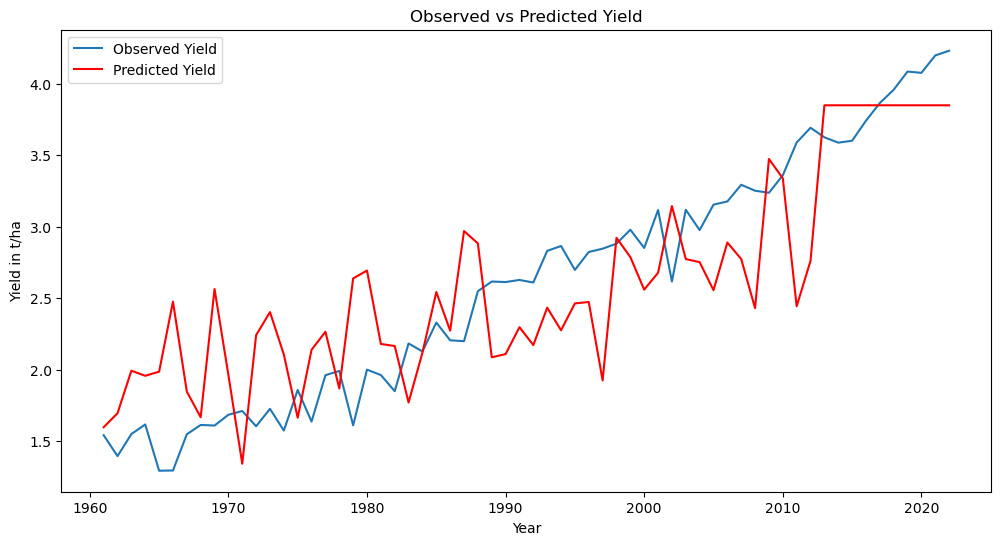

In [114]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Yield(t/ha)'], label='Observed Yield')
plt.plot(filtered_data.index, predictions, label='Predicted Yield', color='red')

plt.xlabel('Year')
plt.ylabel('Yield in t/ha')
plt.title('Observed vs Predicted Yield')
plt.legend()
plt.show()

##### RNN

In [115]:
timeseries_df

,Country,Crop_type,Area harvested,Production,Yield(t/ha),AverageTemperature,Average precipitation in depth (mm per year),Nitrogen(t/ha),Phosphorus(t/ha),Potassium (t/ha)
Year,,,,,,,,,,
1976-01-01,Afghanistan,"Almonds, in shell",5900.0,9800.0,1.661017,13.708583,327.0,30646.0,13590.0,50.0
1977-01-01,Afghanistan,"Almonds, in shell",6000.0,9000.0,1.500000,14.805417,327.0,37014.0,17212.0,50.0
1978-01-01,Afghanistan,"Almonds, in shell",6000.0,12000.0,2.000000,14.329667,327.0,35497.0,18122.0,50.0
1979-01-01,Afghanistan,"Almonds, in shell",6000.0,10500.0,1.750000,14.262083,327.0,33227.0,16430.0,82.0
1980-01-01,Afghanistan,"Almonds, in shell",5800.0,9900.0,1.706897,14.887333,327.0,37846.0,12980.0,300.0
...,...,...,...,...,...,...,...,...,...,...
2018-01-01,Zimbabwe,Wheat,16558.0,45000.0,2.717720,20.710750,657.0,50100.0,45800.0,36900.0
2019-01-01,Zimbabwe,Wheat,24186.0,94685.0,3.914868,20.710750,657.0,50100.0,45800.0,36900.0
2020-01-01,Zimbabwe,Wheat,44466.0,212530.0,4.779607,20.710750,657.0,39300.0,47900.0,16700.0


In [116]:
timeseries_df.columns

Index(['Country', 'Crop_type', 'Area harvested', 'Production', 'Yield(t/ha)',
       'AverageTemperature', 'Average precipitation in depth (mm per year)',
       'Nitrogen(t/ha)', 'Phosphorus(t/ha)', 'Potassium (t/ha)'],
      dtype='object')

##### 2nd try

In [117]:
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782971 entries, 1976-01-01 to 2022-01-01
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Country                                       782971 non-null  object 
 1   Crop_type                                     782971 non-null  object 
 2   Area harvested                                782971 non-null  float64
 3   Production                                    782971 non-null  float64
 4   Yield(t/ha)                                   782971 non-null  float64
 5   AverageTemperature                            782971 non-null  float64
 6   Average precipitation in depth (mm per year)  782971 non-null  float64
 7   Nitrogen(t/ha)                                782971 non-null  float64
 8   Phosphorus(t/ha)                              782971 non-null  float64
 9   Potassium (t/ha)                

In [118]:
timeseries_data = timeseries_df.copy()

In [119]:
timeseries_data.reset_index(inplace =True)

In [120]:
timeseries_data['Year'] =pd.to_datetime(timeseries_data['Year']).dt.year

In [121]:
timeseries_data.columns

Index(['Year', 'Country', 'Crop_type', 'Area harvested', 'Production',
       'Yield(t/ha)', 'AverageTemperature',
       'Average precipitation in depth (mm per year)', 'Nitrogen(t/ha)',
       'Phosphorus(t/ha)', 'Potassium (t/ha)'],
      dtype='object')

In [122]:
timeseries_data.rename(columns = {'Average precipitation in depth (mm per year)':'Averageprecipitation_mm_per_yr', 
                                 'Nitrogen(t/ha)': 'Nitrogen_t_ha',
                                  'Phosphorus(t/ha)': 'Phosphorus_t_ha',
                                  'Potassium (t/ha)': 'Potassium_t_ha',
                                  'Yield(t/ha)':'Yield_t_ha',
                                 'Area harvested': 'Areaharvested'}, inplace = True)

In [123]:
# Select features and target variable
features = timeseries_data[[
    'Year','Country', 'Crop_type','Nitrogen_t_ha','AverageTemperature',
    'Averageprecipitation_mm_per_yr']]
target = timeseries_data['Yield_t_ha']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 123)

In [125]:
numeric_features = features.select_dtypes(include = 'number').columns
categoric_features = features.select_dtypes(exclude = 'number').columns

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False,drop= 'first', handle_unknown='ignore'), categoric_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Year', 'Nitrogen_t_ha', 'AverageTemperature',
       'Averageprecipitation_mm_per_yr'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Country', 'Crop_type'], dtype='object'))])

In [127]:
X_train_dummy= preprocessor.fit_transform(X_train)
X_test_dummy= preprocessor.transform(X_test)

In [128]:

models ={'lr':LinearRegression(),
         'lss':Lasso(),
         'rg':Ridge(),
         'Knr':KNeighborsRegressor(),
         'Dtr':DecisionTreeRegressor(),
         'XGB': XGBRegressor()
        }

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_prediction = model.predict(X_test_dummy)
    mse = mean_squared_error(y_test, y_prediction)
    r2 = r2_score(y_test, y_prediction)
    print(f'{name} MSE: {mse} Score: {r2}')

#print(f'{name} MSE:{mean_squared_error(y_test, y_prediction)} Score{r2_score(y_test, y_prediction)}')


lr MSE: 6129.663861736989 Score: 0.03301346150444495
lss MSE: 6333.4205705789345 Score: 0.0008697748321245813
rg MSE: 6129.653415082217 Score: 0.03301510951888176
Knr MSE: 523.9703173619773 Score: 0.917340941544436
Dtr MSE: 5995.512970208904 Score: 0.054176466387077404
XGB MSE: 792.263837281319 Score: 0.8750162353322303


In [129]:
my_KNR = KNeighborsRegressor()
my_KNR.fit(X_train_dummy, y_train)
my_KNR.predict(X_test_dummy)              

array([18.29841805,  8.12962457, 10.89982456, ...,  4.72437256,
        0.9752895 ,  4.91596559])

In [130]:
def prediction(Year, Country, Crop_type, Averageprecipitation_mm_per_yr, AverageTemperature, Nitrogen_t_ha):
    input_data = pd.DataFrame([[
        Year, Country, Crop_type, Averageprecipitation_mm_per_yr, AverageTemperature, Nitrogen_t_ha
    ]], columns=['Year', 'Country', 'Crop_type','Averageprecipitation_mm_per_yr', 'AverageTemperature', 'Nitrogen_t_ha'])
    
    transformed_features = preprocessor.transform(input_data)
    predicted_value = my_KNR.predict(transformed_features)
    return predicted_value


In [131]:
#def prediction(Year, Country, Crop_type,Areaharvested,Production, Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha, Phosphorus_t_ha,Potassium_t_ha):
    #features = np.array([[Year, Country, Crop_type,Areaharvested,Production, Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha, Phosphorus_t_ha,Potassium_t_ha]])
    #transformed_features = preprocessor.transform(features)
    #predicted_value = knr.predict(features).reshape(1,-1)
    #return predicted_value

In [132]:
Year = 2022
Country = 'Zimbabwe'
Crop_type = 'Wheat'
Averageprecipitation_mm_per_yr= 657.0	
AverageTemperature= 20.71075
Nitrogen_t_ha = 39300.0	

result = prediction (Year, Country, Crop_type, Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha)
result

array([3.92850213])

In [133]:
Year = 2030
Country = 'Afghanistan'
Crop_type = 'Almonds, in shell'
Averageprecipitation_mm_per_yr= 887.0	
AverageTemperature= 24.710
Nitrogen_t_ha = 49310.0	

result = prediction (Year, Country, Crop_type,Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha)
result

array([1.10884255])

In [134]:
Year = 2024
Country = 'Nigeria'
Crop_type = 'Maize (corn)'
Averageprecipitation_mm_per_yr= 236	
AverageTemperature= 27
Nitrogen_t_ha = 0.455	

result = prediction (Year, Country, Crop_type, Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha)
result

array([1.97200089])

##### 3rd try 

In [158]:
my_NN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    Dropout(0.3),  # Dropout rate of 0.2 (20% of neurons will be randomly dropped)
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

# Compile the model with an optimizer and loss function
my_optimizer = Adam(learning_rate=0.001)
my_NN.compile(optimizer=my_optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = my_NN.fit(X_train_dummy, y_train, epochs=100, validation_split=0.2)

C:\Users\deola\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 5192.3906 - mean_squared_error: 5192.3906 - val_loss: 5079.9863 - val_mean_squared_error: 5079.9863
Epoch 2/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 5448.9810 - mean_squared_error: 5448.9810 - val_loss: 4493.0938 - val_mean_squared_error: 4493.0938
Epoch 3/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 2824.8264 - mean_squared_error: 2824.8264 - val_loss: 4143.5796 - val_mean_squared_error: 4143.5796
Epoch 4/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 4135.2275 - mean_squared_error: 4135.2275 - val_loss: 3751.5596 - val_mean_squared_error: 3751.5596
Epoch 5/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 2569.3232 - mean_squared_error: 2569.3232 - val_loss: 3500.7534 - val_mean_squared_error: 3500.7534
Epoch 6/100
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 4110.7666 - mean_squared_error: 4110.7666 - val_loss: 3378.6055 - val_mean_squared_error: 3378.6055
Epoc

In [136]:
test_loss, test_mse = my_NN.evaluate(X_test_dummy, y_test)
print(f'Test MSE: {test_mse}')

# Make predictions on the test set
y_pred = my_NN.predict(X_test_dummy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R²: {r2}')

4894/4894 ━━━━━━━━━━━━━━━━━━━━ 4s 866us/step - loss: 917.9036 - mean_squared_error: 917.9036
Test MSE: 2657.350341796875
4894/4894 ━━━━━━━━━━━━━━━━━━━━ 4s 816us/step
Test MSE: 2657.3499367106174
Test MAE: 4.001105329096763
Test R²: 0.580789146871258


In [154]:
def prediction(year, country, crop_type, avg_precipitation, avg_temperature, nitrogen):
    input_data = pd.DataFrame([[
        year, country, crop_type, avg_precipitation, avg_temperature, nitrogen
    ]], columns=['Year', 'Country', 'Crop_type', 'Averageprecipitation_mm_per_yr', 'AverageTemperature', 'Nitrogen_t_ha'])
    
    transformed_features = preprocessor.transform(input_data)
    predicted_value = my_NN.predict(transformed_features)
    return predicted_value

In [159]:
year = 2026
country = 'Congo'
crop_type = 'Wheat'
avg_precipitation = 270
avg_temperature = 20
nitrogen = 10000


result = prediction(year, country, crop_type, avg_precipitation, avg_temperature, nitrogen)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
[[2.1754017]]


##### 4th try

In [139]:


# Define the model
my_SNN = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

# Compile the model
my_SNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = my_SNN.fit(X_train_dummy, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_mse = my_SNN.evaluate(X_test_dummy, y_test)
print(f'Test MSE: {test_mse}')

# Make predictions on the test set
y_pred = my_SNN.predict(X_test_dummy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R²: {r2}')


C:\Users\deola\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 7914.1699 - mean_squared_error: 7914.1699 - val_loss: 5383.1904 - val_mean_squared_error: 5383.1904 - learning_rate: 0.0010
Epoch 2/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 5872.4819 - mean_squared_error: 5872.4819 - val_loss: 12884.7578 - val_mean_squared_error: 12884.7578 - learning_rate: 0.0010
Epoch 3/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 6632.8174 - mean_squared_error: 6632.8174 - val_loss: 57502.5938 - val_mean_squared_error: 57502.5938 - learning_rate: 0.0010
Epoch 4/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 6575.9077 - mean_squared_error: 6575.9077 - val_loss: 105744.6719 - val_mean_squared_error: 105744.6719 - learning_rate: 0.0010
Epoch 5/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 4574.8843 - mean_squared_error: 4574.8843 - val_loss: 172864.1250 - val_mean_squared_error: 172864.1250 - learning_rate: 0.0010
Epoch 6/50
15660/15660 ━━━━━━━━━━━━━━━━━━━━

##### 6th try

In [140]:
#pip install xgboost

In [142]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize the XGBRegressor
my_XGB = XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the random search with cross-validation
random_search = RandomizedSearchCV(estimator=my_XGB, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_dummy, y_train)

# Get the best estimator
best_XGB = random_search.best_estimator_

# Predict on the test set
y_prediction = best_XGB.predict(X_test_dummy)

# Evaluate the model
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Best Parameters: {random_search.best_params_}')


C:\Users\deola\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
MSE: 896.46
R² Score: 0.86
Best Parameters: {'max_depth': 5, 'learning_rate': 0.1}


In [144]:
my_XGB =XGBRegressor()

my_XGB.fit(X_train_dummy, y_train)
y_prediction = my_XGB.predict(X_test_dummy)


mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)
    

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

MSE: 792.26
R² Score: 0.88


In [145]:
def prediction(Year, Country, Crop_type, Averageprecipitation_mm_per_yr, AverageTemperature, Nitrogen_t_ha):
    input_data = pd.DataFrame([[
        Year, Country, Crop_type, Averageprecipitation_mm_per_yr, AverageTemperature, Nitrogen_t_ha
    ]], columns=['Year', 'Country', 'Crop_type','Averageprecipitation_mm_per_yr', 'AverageTemperature', 'Nitrogen_t_ha'])
    
    transformed_features = preprocessor.transform(input_data)
    predicted_value = my_XGB.predict(transformed_features)
    return predicted_value


In [ ]:
timeseries_df[timeseries_df['Country']=='Nigeria']

In [146]:
Year = 2022
Country = 'Nigeria'
Crop_type = 'Bananas'
AverageTemperature= 28.005875
Averageprecipitation_mm_per_yr= 1150.0
Nitrogen_t_ha = 436400.0		

result = prediction (Year, Country, Crop_type, Averageprecipitation_mm_per_yr,AverageTemperature, Nitrogen_t_ha)
result

array([15.899029], dtype=float32)

In [ ]:
#timeseries_df.to_csv('Dashboard_data.csv', index = True)

In [ ]:
timeseries_df.describe

In [ ]:
#pip install xgboost

In [148]:
import pickle


In [149]:
pickle.dump(my_XGB, open('boost.pkl', 'wb'))

In [150]:
pickle.dump(my_ARIMA, open('arima.pkl', 'wb'))

In [ ]:
#pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

In [151]:
pickle.dump(my_KNR, open('knr.pkl', 'wb'))

In [160]:
pickle.dump(my_NN, open('nn.pkl', 'wb'))

In [ ]:
#nn_model =pickle.load(open('nn.pkl', 'rb'))

In [ ]:
#nn_model

In [ ]:
#pip install streamlit-option-menu


In [161]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

json==2.0.9
numpy==1.26.4
pandas==2.1.4
tensorflow==2.16.2
keras==3.4.1
torch==2.3.1+cpu
ipywidgets==7.6.5
xarray==2023.6.0
pandas==2.1.4
xarray==2023.6.0
pmdarima==2.0.4
numpy==1.26.4
tensorflow==2.16.2
statsmodels.api==0.14.0
